---
# **Pancake Flipping Analysis**
---

# **Table of Contents**

1. [Objective](#Section1)<br>
2. [Data Description](#Section2)<br>
  2.1 [Importing packages](#Section21)<br>
  2.2 [Importing the Dataset](#Section22)<br>
  2.3 [Data Description](#Section23)<br>
3. [Data Pre-processing](#Section3)<br>
  3.1 [Checking for Null Values](#Section31)<br>
  3.2 [Checking for Duplicates records](#Section32)<br>
  3.3 [Checking for Constant or Primary Key Columns](#Section33)<br>
4. [Exploratory Data Analysis](#Section4)<br>
  4.1 [Distribution of Scores](#Section41)<br>
  4.2 [Finding Correlation between Match Day vs Scores](#Section42)<br>
  4.3 [Finding the Proportion of Right - Left Usage of Both the contestants](#Section43)<br>
  4.4 [Creating a new categorical variable "Match Day Bucket"](#Section44)<br>
  4.5 [Match Day Bucket vs Avg. Score](#Section45)<br>
  4.6 [Match Day Bucket vs Hand vs Score](#Section46)<br>
5. [Analysis - Summary](#Section5)<br>

<a name = Section1></a>

---
### **1. Objective**
---

- Arielle and Boris compete in the little-known sport of pancake flipping, and have both been nominated for this season's "best pancake flipper" award. As a Data Scientist our objective is to provide the Data Driven Analysis and suggestion on who is the better pancake flipper.

#### Data in Scope

- History of data from this season for both the players are taken into scope for the Analysis.

<a name = Section2></a>

---
### **2. Data Description**
---


<a name = Section21></a>
#### 2.1 Importing packages

In [1]:
import numpy as np                    # Implements multi-dimensional array and matrices
import pandas as pd                   # For data manipulation and analysis
import matplotlib.pyplot as plt
import seaborn as sns

<a name = Section22></a>
#### 2.2 Importing the Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/sunilkumarmano/PayPal-Case-Study/main/data.csv")     # Importing training dataset using pd.read_csv
data.head()

,match_day,name,hand,score,attempts
0,1,Arielle,R,8,20
1,2,Arielle,R,10,20
2,3,Arielle,R,6,20
3,4,Arielle,L,4,20
4,5,Arielle,R,7,20


<a name = Section23></a>
#### 2.3 Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
match_day    100 non-null int64
name         100 non-null object
hand         100 non-null object
score        100 non-null int64
attempts     100 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


The stats data collected for this analysis are as follows.

- The contestant's name
- The match day
- Which hand they used to flip the pancakes (Right or Left)
- Their score (how many pancakes they flipped successfully)
- How many total pancakes they attempted to flip

The sample size provided for the analysis is 100 records with equal split between both the contestants of 50 each.
Hence, the sample size is equally distributed and not biased towards any particular contestant.

<a name = Section3></a>

---
### **3. Data Pre-processing**
---

<a name = Section31></a>
#### 3.1 Checking for Null Values

In [4]:
data.isnull().sum()

match_day    0
name         0
hand         0
score        0
attempts     0
dtype: int64

Using the Pandas Dataframe, we checked for the Null values in the data and it is clearly evident that the data provided does not contain any Null values.

<a name = Section32></a>
#### 3.2 Checking for Duplicates records

In [5]:
print('Contains Duplicate Rows?', data.duplicated().any())

Contains Duplicate Rows? False


Using the Pandas Dataframe, we checked for the Duplicate records in the data and it is clearly evident that the data provided does not contain any Duplicate records.

<a name = Section33></a>
#### 3.3 Checking for Constant or Primary Key Columns

In [6]:
data.describe()

,match_day,score,attempts
count,100.00000,100.000000,100.0
mean,25.50000,6.790000,20.0
std,14.50357,2.539765,0.0
min,1.00000,1.000000,20.0
25%,13.00000,5.000000,20.0
50%,25.50000,7.000000,20.0
75%,38.00000,9.000000,20.0
max,50.00000,13.000000,20.0


Using the Pandas Dataframe, we checked for the constant values in the data and it is clearly 	evident that the variable ”Attempts” has constant value in all the records since, it contains 	minimum, maximum and mean values are same. Hence, we are dropping it from the analysis.

<a name = Section34></a>
#### 3.4 Dropping Constant or Primary Key Columns

In [7]:
data = data.drop(['attempts'], axis = 1)
data.head()

,match_day,name,hand,score
0,1,Arielle,R,8
1,2,Arielle,R,10
2,3,Arielle,R,6
3,4,Arielle,L,4
4,5,Arielle,R,7


<a name = Section4></a>

---
### **4. Exploratory Data Analysis**
---

Variables considered for the analysis after the Data pre-processing are Name, Match Day, Hand and Score.

Here is the initial Plan of Action (or) the Approach for the Analysis with the given data.

- Step 1: Distribution of Scores – Overall, Arielle and Boris
- Step 2: Finding Correlation between Match Day and Scores – Overall, Arielle and Boris.
- Step 3: Finding Proportion of Right Hand or Left Hand usage between Arielle and Boris.
- Step 4: Creating Additional Derived Variables, when required.

<a name = Section41></a>
#### 4.1 Distribution of Scores

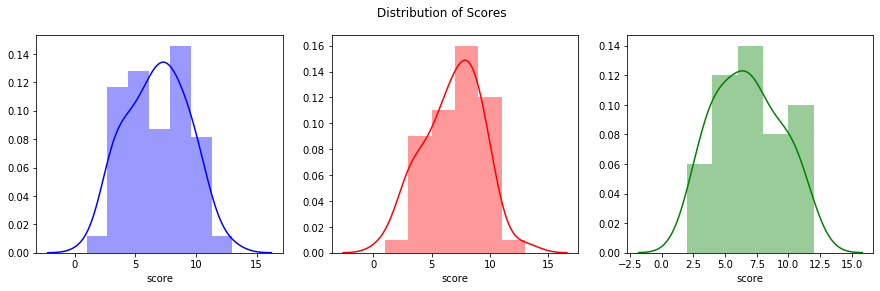

In [8]:
Arielle_data = data[data['name'] == 'Arielle']
Boris_data = data[data['name'] == 'Boris']

figure = plt.figure(figsize = [15, 4])

plt.subplot(1, 3, 1)
sns.distplot(data.score, color="b")

plt.subplot(1, 3, 2)
sns.distplot(Arielle_data.score, color="r")

plt.subplot(1, 3, 3)
sns.distplot(Boris_data.score, color="g")

plt.suptitle("Distribution of Scores")
plt.show()

- Overall Score Distribution

Overall score in the given sample is normally distributed since, the mean, median and mode remains at its peak.

- Arielle Score Distribution

Arielle score in the given sample is left or negatively skewed since, the mean is also at the left of its peak.

- Boris Score Distribution

Boris score in the given sample is right or positively skewed since, the mean also remains at the right of its peak.


<a name = Section42></a>
#### 4.2 Finding Correlation between Match Day vs Scores

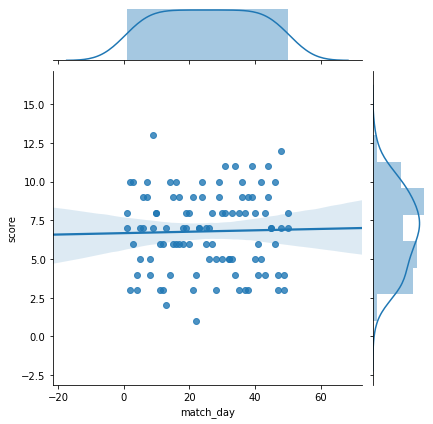

In [9]:
# Finding correlation between Match Day vs Scores - Overall
sns.jointplot("match_day", "score", data=data, kind='reg')

Based on the above chart, it is clearly evident that there is no correlation between Match day and Score variable for the overall data.

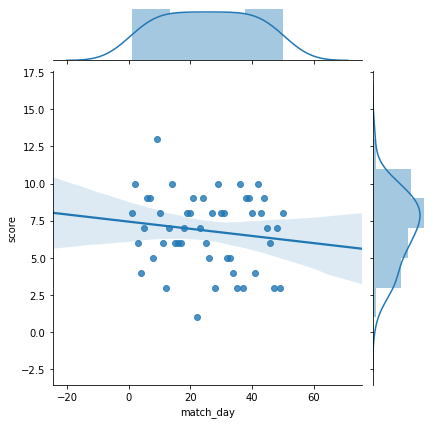

In [10]:
# Finding correlation between Match Day vs Scores - Arielle Data
sns.jointplot("match_day", "score", data=Arielle_data, kind='reg')

Based on the above chart, it is clearly evident that there is a negative corelation between Match day and Score variable for Arielle sample.

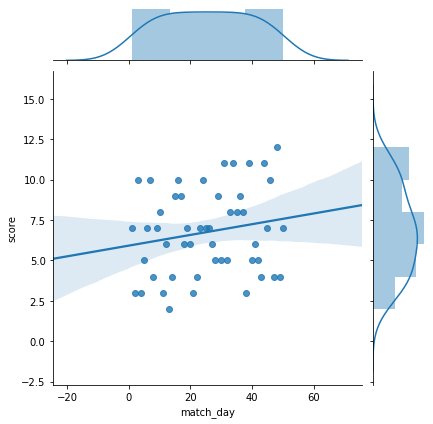

In [11]:
# Finding correlation between Match Day vs Scores - Boris Data
sns.jointplot("match_day", "score", data=Boris_data, kind='reg')

Based on the above chart, it is clearly evident that there is a positive corelation between Match day and Score variable for Boris sample.

<a name = Section43></a>
#### 4.3 Finding the Proportion of Right - Left Usage of Both the contestants

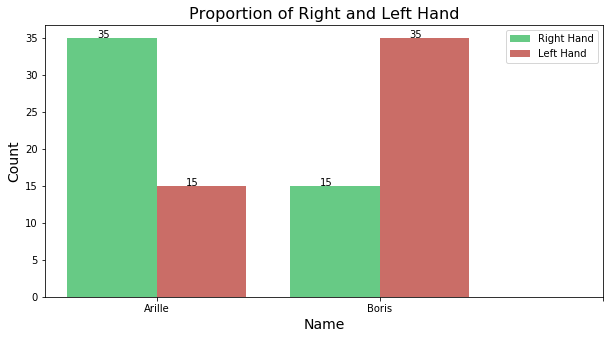

In [12]:
figure = plt.figure(figsize = [10, 5])

ax = sns.countplot(x = 'name', hue = 'hand', data = data, palette = ['#56DB7F', '#DB5E56'])
total = data.shape[0]

for p in ax.patches:
  percentage = '{:.0f}'.format(100 * p.get_height() / total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Name', size = 14)
plt.xticks(ticks = [0, 1, 2], labels = ['Arille', 'Boris'], rotation = 0)
plt.ylabel('Count', size = 14)
plt.legend(labels = ['Right Hand', 'Left Hand'])
plt.title('Proportion of Right and Left Hand', size = 16)
plt.show()

- From the chart, it is clearly evident that Arille has used Right hand in most of the Pan Flippings in this season. Whereas Boris has used Left hand in most of the Pan Flippings in this season.
- And also from the previous analysis, we can see that Match Day variable shows correlation with the other variables.
- So, to further analyze lets create a categorical variable Match Day Bucket from the Match Day variable(continuous).

<a name = Section44></a>
#### 4.4 Creating a new categorical variable "Match Day Bucket"

In [13]:
#add a new column Match_Day_Bucket next to Match_day column. 
category = pd.cut(data.match_day, 
                  bins=[0,10,20,30,40,50],
                  labels=['1 to 10','11 to 20','21 to 30','31 to 40','41 to 50'])
data.insert(1,'match_day_bucket',category)

In [14]:
data.head()

,match_day,match_day_bucket,name,hand,score
0,1,1 to 10,Arielle,R,8
1,2,1 to 10,Arielle,R,10
2,3,1 to 10,Arielle,R,6
3,4,1 to 10,Arielle,L,4
4,5,1 to 10,Arielle,R,7


- We have created the new categorical variable Match day bucket from the continuous variable Match day for our analysis.

- The Main reason for creating this categorical variable is to simplify the analysis by comparing it with the other features.

<a name = Section45></a>
#### 4.5 Match Day Bucket vs Avg. Score


Let's pivot the parent dataframe by grouping it with Name, Match_Day_Bucket and Avg.Scores.

In [16]:
data_df = data.groupby(["name", "match_day_bucket"])
data_mean_df = data_df.score.mean()
data_mean_df = data_mean_df.reset_index()
print(data_mean_df)

      name match_day_bucket  score
0  Arielle          1 to 10    7.9
1  Arielle         11 to 20    6.7
2  Arielle         21 to 30    6.6
3  Arielle         31 to 40    6.4
4  Arielle         41 to 50    6.5
5    Boris          1 to 10    6.4
6    Boris         11 to 20    6.2
7    Boris         21 to 30    6.3
8    Boris         31 to 40    7.9
9    Boris         41 to 50    7.0


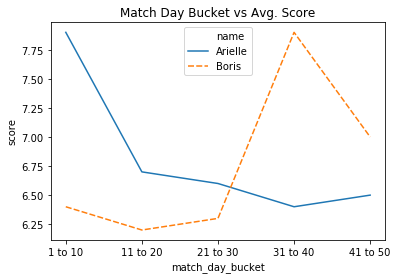

In [24]:
sns.lineplot(x="match_day_bucket", y="score",
             hue="name", style="name",
             data=data_mean_df)
plt.title("Match Day Bucket vs Avg. Score")
plt.show()

- When trying to understand the performance of the contestants over this season, it is clearly evident that Arille dominated the floor initially with high Avg. score when compared to Boris. But as the season progress Arille Avg. score seems to have a negative trend.

- Whereas Boris started the season with low Avg. score and consistently showed upward trend and towards the end of the season, his Avg. score is higher than Arille.

<a name = Section46></a>
#### 4.6 Match Day Bucket vs Hand vs Score


Let's pivot the parent dataframe by grouping it with Name, Match_Day_Bucket, hand and Scores.

In [30]:
hand_df = data.groupby(["name", "match_day_bucket","hand"])
data_hand_df = hand_df.score.sum()
data_hand_df = data_hand_df.reset_index()
print(data_hand_df)

       name match_day_bucket hand  score
0   Arielle          1 to 10    L      9
1   Arielle          1 to 10    R     70
2   Arielle         11 to 20    L     21
3   Arielle         11 to 20    R     46
4   Arielle         21 to 30    L     21
5   Arielle         21 to 30    R     45
6   Arielle         31 to 40    L     10
7   Arielle         31 to 40    R     54
8   Arielle         41 to 50    L     11
9   Arielle         41 to 50    R     54
10    Boris          1 to 10    L     54
11    Boris          1 to 10    R     10
12    Boris         11 to 20    L     30
13    Boris         11 to 20    R     32
14    Boris         21 to 30    L     37
15    Boris         21 to 30    R     26
16    Boris         31 to 40    L     41
17    Boris         31 to 40    R     38
18    Boris         41 to 50    L     37
19    Boris         41 to 50    R     33


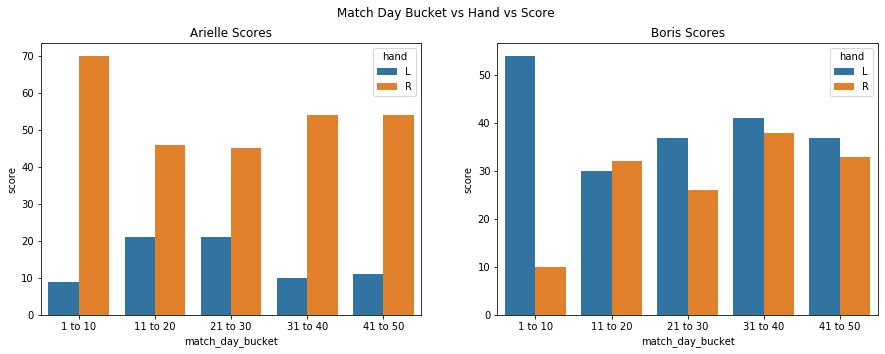

In [37]:
Arielle_data_df = data_hand_df[data_hand_df['name'] == 'Arielle']
Boris_data_df = data_hand_df[data_hand_df['name'] == 'Boris']

figure = plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sns.barplot(x = 'match_day_bucket', y = 'score', hue = 'hand', data = Arielle_data_df)
plt.title("Arielle Scores")

plt.subplot(1, 2, 2)
sns.barplot(x = 'match_day_bucket', y = 'score', hue = 'hand', data = Boris_data_df)
plt.title("Boris Scores")

plt.suptitle("Match Day Bucket vs Hand vs Score")
plt.show()

When trying to understand the Hand feature impact with Match Day Bucket and Score, we gathered the below insights.
- Arille is good at pan flipping with right hand throughout the season and it is clearly evident that he is not good at pan flipping with left hand.
- Boris was a left handed pan flipper initially during the inception of the season and as the season progress he improved himself at pan flipping with both the hands.


<a name = Section5></a>

---
### **5. Analysis - Summary**
---

#### Key Insights:
 - Boris score is positively skewed, whereas Arielle score is negatively skewed.
 - Boris score shows the positive correlation with match day, whereas Arielle score is negatively correlated.
 - Boris score shows the upward trend when compared with Match day Bucket, whereas Arielle shows downward trend.
 - Boris despite being a left hand pan flipper showed continuous improvement throughout the season in terms of scores and proved himself to be ambidextrous.

#### Key Suggestions:

 - Since, Boris showed positive trend on all the touch points from this season data, he is a better pancake flipper.
 - Whereas Arielle showed his strong competitiveness in pancake flipping using Right Hand consistently.
 - In the upcoming competitions, Boris can give tough competition to Arielle in pancake flipping using the Right Hand, whereas when comes to Left Hand pancake flipping Boris outperforms Arielle.